In [41]:
# Load Packages
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

In [42]:
# OS setup
main_path = os.getcwd()
data_path = os.path.join(main_path, 'data')
csv_path = os.path.join(main_path, 'info.csv') # csv 파일을 저장할 위치

if not os.path.exists(data_path):
    os.mkdir(data_path)

In [43]:
# Save empty csv
if not os.path.exists(csv_path):
    df = pd.DataFrame(columns=['state', 'gender', 'age', 'source', 'file', 'detail'])
    df.to_csv(csv_path)

In [46]:
# %run donateacry_corpus_data_trans.ipynb

In [47]:
# %run asvp-esd-data-trans.ipynb

In [82]:
# Check csv
df = pd.read_csv(csv_path, index_col=0).fillna('')

df.state = df.state.astype('category')
df.gender = df.gender.astype('category')
df.age = df.age.astype('category')
df.source = df.source.astype('category')

df.info()
df.tail(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1796 entries, 0 to 1795
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   state   1796 non-null   category
 1   gender  1796 non-null   category
 2   age     1796 non-null   category
 3   source  1796 non-null   category
 4   file    1796 non-null   object  
 5   detail  1796 non-null   object  
dtypes: category(4), object(2)
memory usage: 50.2+ KB


,state,gender,age,source,file,detail
1786,calm,m,,asvp-esd,03-01-02-01-35-200-02-02-02.wav,
1787,sad,m,,asvp-esd,03-02-04-01-05-200-05-02-01-34.wav,sad
1788,sad,m,,asvp-esd,03-02-04-01-04-200-05-02-01-34.wav,sad
1789,calm,m,,asvp-esd,03-01-02-01-31-200-04-02-04.wav,
1790,calm,m,,asvp-esd,03-01-02-01-07-200-05-02-01-12.wav,
1791,sad,m,,asvp-esd,03-02-04-01-07-200-05-02-01-34.wav,sad
1792,calm,m,,asvp-esd,03-01-02-01-04-200-05-02-01-12.wav,
1793,sad,m,,asvp-esd,03-02-04-01-06-200-05-02-01-34.wav,sad
1794,sad,m,,asvp-esd,03-01-04-01-01-200-02-02-01-34.wav,sad
1795,calm,m,,asvp-esd,03-02-02-01-02-200-05-02-01-12.wav,


상태에 따른 파일의 개수와 비율
sad        state exists in 65.70% of  1180 files.
hungry     state exists in 21.27% of   382 files.
happy      state exists in 06.12% of   110 files.
calm       state exists in 01.67% of    30 files.
tired      state exists in 01.34% of    24 files.
discomfort state exists in 01.11% of    20 files.
belly_pain state exists in 00.89% of    16 files.
fearful    state exists in 00.56% of    10 files.
burping    state exists in 00.45% of     8 files.
ch         state exists in 00.39% of     7 files.
bored      state exists in 00.33% of     6 files.
pain       state exists in 00.11% of     2 files.
disgust    state exists in 00.06% of     1 files.


<Axes: xlabel='count', ylabel='state'>

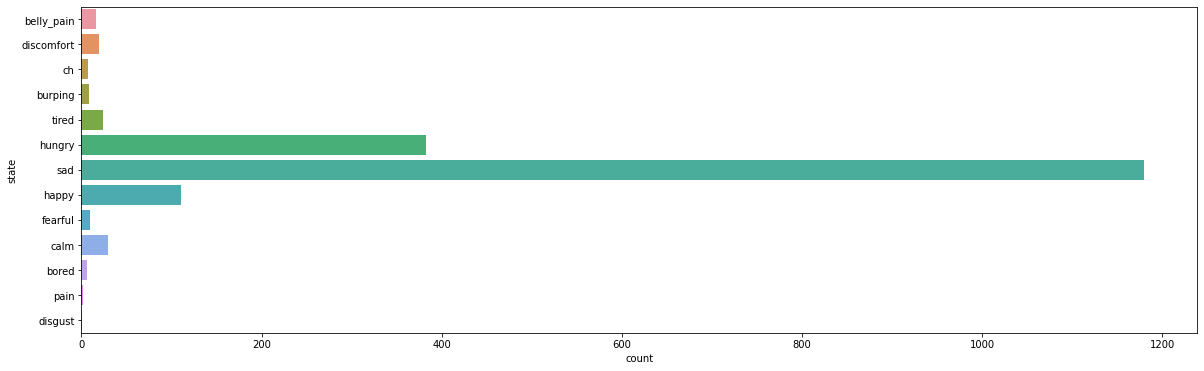

In [81]:
# 상태에 따른 파일의 개수를 알아보자.

print("상태에 따른 파일의 개수와 비율")
value_counts = df.state.value_counts()
keys = value_counts.index.tolist()
counts = value_counts.values.tolist()
rates = list(df.state.value_counts(normalize=True).values)

for i in range(len(keys)):
    print(f"{keys[i]:10s} state exists in {rates[i]*100:05.2f}% of {counts[i]:5d} files.")

fig, ax = plt.subplots(figsize=(20, 6))
sns.countplot(y='state', 
              data=df,
              order=df.state.unique())

NULL value counts: 0

Male exists in 89.92% of 1615 files.
Male exists in 10.08% of  181 files.


<Axes: xlabel='count', ylabel='gender'>

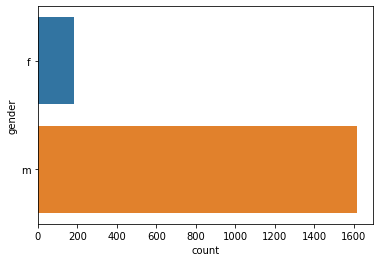

In [80]:
print(f"NULL value counts: {len(df) - (df.gender == '').value_counts().values[0]}\n") # NULL 값은 없다.

# 남성 자료가 많다.
gender_count = (df.gender == 'm').value_counts().values
gender_rate = (df.gender == 'm').value_counts(normalize=True).values
print(f"Male exists in {gender_rate[0]*100:05.2f}% of {gender_count[0]:4d} files.")
print(f"Male exists in {gender_rate[1]*100:05.2f}% of {gender_count[1]:4d} files.")

sns.countplot(y='gender',data=df)